# Data Analysis Report - Prosper Loan Data
## by Johnny Yamanaka

## Investigation Overview

<br/>

Financial loan is one of the most common activities in society and can serve many purposes. In this investigation, we will take a look over a loan dataset to understand pattern about these loans, such as how prosper rating can influence borrower rate, what is the reasons to loan and much more.

<br/>

## Dataset Overview

<br/>

This dataset includes more than 70 thousand loans realized between 2010 and 2013, with informations like borrower rate, income, prosper rating.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('./resources/cleanProsperLoanData.csv')

#set default values for fontsize and figure size
FONTSIZE = 18
FIGSIZE = (12, 4)

#Data convertion
convert_to_date = ['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate']

#Convert datatime column
for feature in convert_to_date:
    df_loan[feature] = pd.to_datetime(df_loan[feature], format="%Y/%m/%d")

In [4]:
#Create a dictionary to order and transform all categorical dtype
ordinal_var_dict = {
    
    'ProsperRating (Alpha)' : ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
    'IncomeRange' : ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
    'LoanStatus' : ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 
                    'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                    'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
                    'Past Due (>120 days)'],
    'LoanOriginalAmountRange' : ['0 - 2501', '2500 - 5001', '5000 - 7501', '7500 - 10001', 
                            '10000 - 12501', '12500 - 15001', '15000 - 17501', '17500 - 20001', 
                            '20000 - 22501', '22500 - 25001']}

categorical_columns = ['ProsperRating (Alpha)', 'LoanStatus', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmountRange']

for column in categorical_columns:
    df_loan[column] = df_loan[column].astype('category')


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(categories = ordinal_var_dict[var], ordered=True)
    
    df_loan[var] = df_loan[var].astype(ordered_var)

## Loan Across the Time

<br/>

Some findings about loan creation:
* There are increasing trend of creation of listing year by year;
* Borrower with C rank loan has increased more than other classes;
* Well rated borrowers keeped loan creation level.

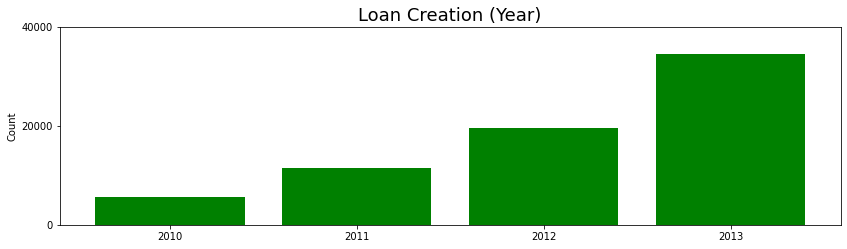

In [5]:
#Creation series with loan created divided by period
loan_creation_year = (df_loan['ListingCreationDate']).dt.year.value_counts()
loan_creation_month = (df_loan['ListingCreationDate']).dt.month.value_counts()

plt.figure(figsize=(14, 8))

#Plot loan creatin by year
plt.subplot(2, 1, 1)
plt.title('Loan Creation (Year)', fontsize=FONTSIZE)
plt.bar(loan_creation_year.index, loan_creation_year, color='g')
plt.xticks(np.arange(2010, 2014, 1))
plt.ylabel('Count')
plt.yticks(np.arange(0, 40001, 20000))

plt.show()

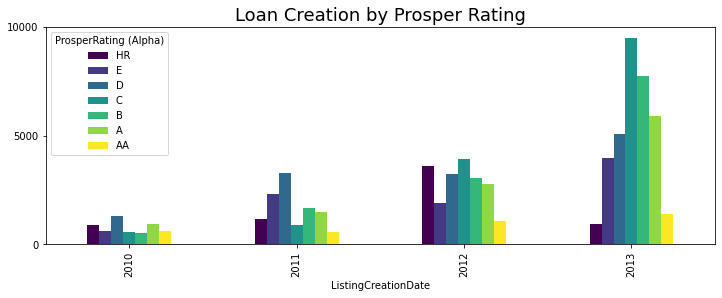

In [6]:
df_loan.groupby([df_loan['ListingCreationDate'].dt.year, 'ProsperRating (Alpha)'])['ListingKey'].\
                count().unstack().plot(kind='bar', colormap='viridis', figsize=FIGSIZE)

plt.title('Loan Creation by Prosper Rating', fontsize=FONTSIZE)
plt.yticks(np.arange(0, 10001, 5000))

plt.show()

## Loan Reason

<br/>

Here, the most common reason to loan was debit consolidation - even if separete data by income range, it still be grater part of loans.

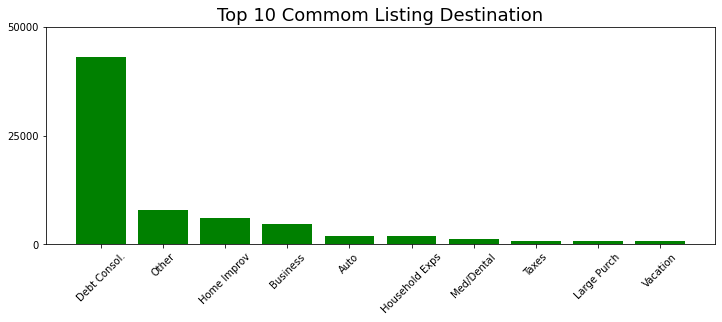

In [7]:
#Creating list with reason to loan
listing_category_index = ['Not Available', 'Debt Consol.', 'Home Improv', 'Business', 
                          'Personal Loan', 'Student Use', 'Auto', 'Other', 
                          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring',
                          'Green Loans', 'Household Exps', 'Large Purch', 'Med/Dental',
                          'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

#ordered list with listing grouped by category
listing_category = df_loan['ListingCategory (numeric)'].value_counts().sort_index()

#List of 10 most common list reason
top_ten_listing = list(listing_category.sort_values(ascending=False)[:10].index)
top_ten_listing_legend = []

#Append in legend list a description of listing
for reason in top_ten_listing:
    top_ten_listing_legend.append(listing_category_index[reason])


plt.figure(figsize=FIGSIZE)
plt.title('Top 10 Commom Listing Destination', fontsize=FONTSIZE)
plt.bar(top_ten_listing_legend, listing_category.sort_values(ascending=False)[:10], color='g')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 50001, 25000))

plt.show()

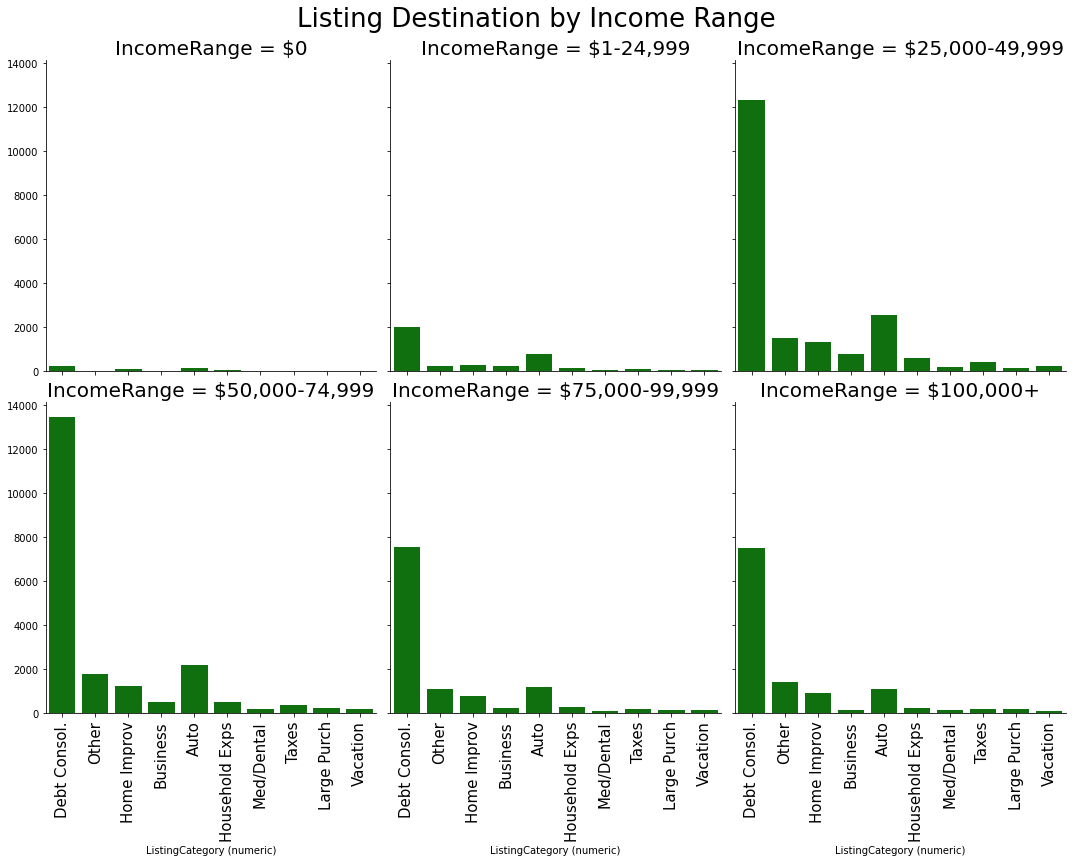

In [8]:
color = {'color': ["g"]}

sub_df = df_loan[df_loan['ListingCategory (numeric)'].isin(top_ten_listing)]

g = sns.FacetGrid(data=sub_df, col='IncomeRange', size=5, aspect=1, hue_kws=color, col_wrap=3);
g.map(sns.countplot, 'ListingCategory (numeric)');
g.fig.suptitle('Listing Destination by Income Range', fontsize=26, y=1.04)
g.set(xticklabels=top_ten_listing_legend)
g.set_xticklabels(rotation=90)

g.set_xticklabels(size=15)
g.set_titles(size=20)
plt.show()

Debit consolidation was most common reason to take a borrow money. After that, auto has appear as second most common reason.

## Prosper Rating 

<br/>

Prosper rating goes from HR to AA and evaluate loan. Here some observation:
* The distribution are balanced - D, C and B classes are majority in the dataset;
* If we split data by income range, income range between \\$25k and \\\$49k are predominant in all rating, except AA;
* There are a positive correlation between prosper rating and income range.

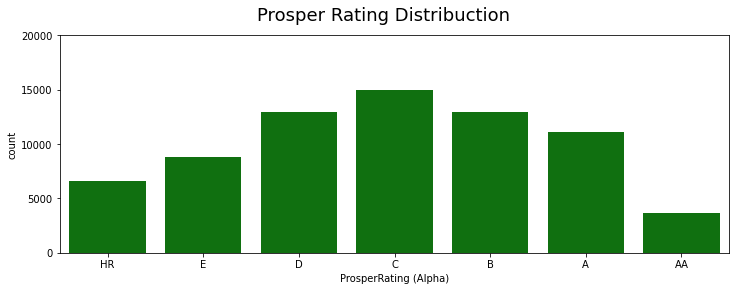

In [9]:
plt.figure(figsize=FIGSIZE)

plt.suptitle('Prosper Rating Distribuction', fontsize=FONTSIZE)
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color='g')
plt.yticks(np.arange(0, 20001, 5000))

plt.show()

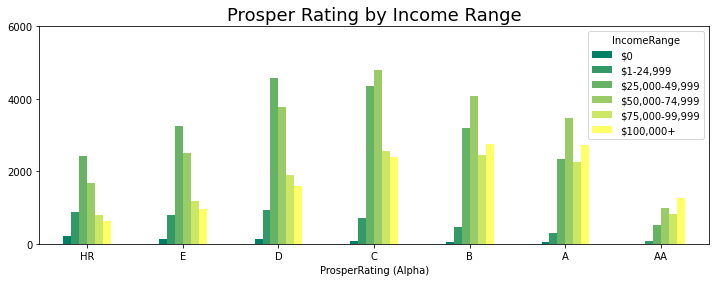

In [10]:
df_loan.groupby(['ProsperRating (Alpha)', 'IncomeRange', ])['ListingKey'].\
                count().unstack().plot(kind='bar', colormap='summer', figsize=FIGSIZE)

plt.title('Prosper Rating by Income Range', fontsize=FONTSIZE)
plt.yticks(np.arange(0, 6001, 2000))
plt.xticks(rotation=0)

plt.show()

## Loan Amount

For the next, let's see the loan amount.

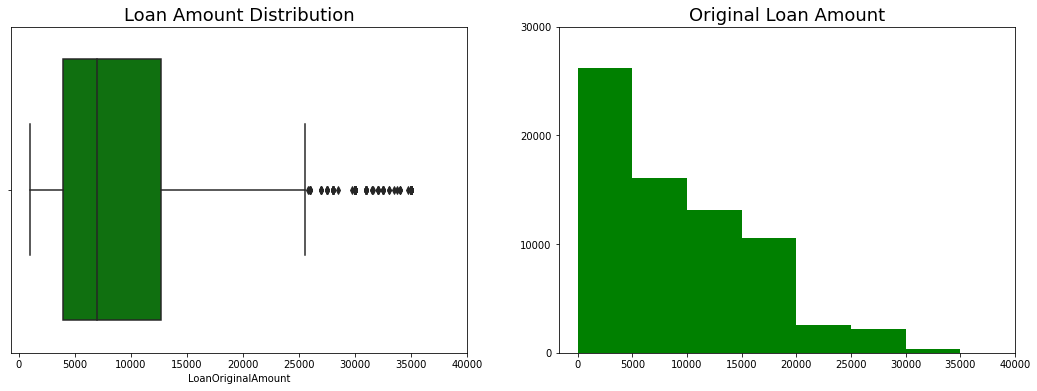

In [11]:
#Define binsize
binsize = 5000
bins = np.arange(0, df_loan['LoanOriginalAmount'].max() + binsize, binsize)

# plt.figure(figsize=FIGSIZE)
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('Loan Amount Distribution', fontsize=FONTSIZE)
sns.boxplot(data=df_loan, x='LoanOriginalAmount', color='g')
plt.xticks(np.arange(0, 40001, 5000))


plt.subplot(1, 2, 2)
plt.title('Original Loan Amount', fontsize=FONTSIZE)

#Fist plot, with all loan amount without segregation
plt.hist(data=df_loan, x='LoanOriginalAmount', bins=bins, color='g')
plt.xticks(np.arange(0, 40001, 5000))
plt.yticks(np.arange(0,30001, 10000))

plt.show()

Most of loan value are in the range 5K to 15K.
Let's see the distribuction by income range and prosper score:

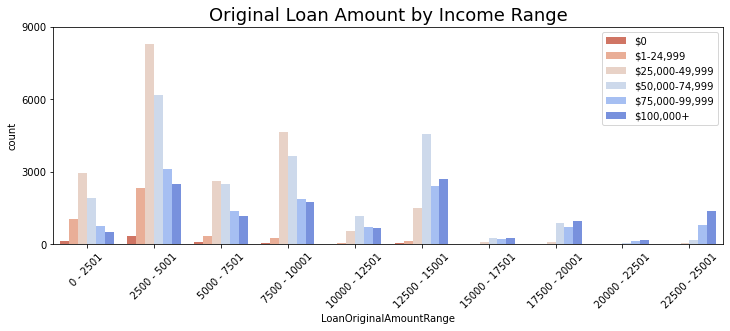

In [12]:
plt.figure(figsize=FIGSIZE)
plt.title('Original Loan Amount by Income Range', fontsize=FONTSIZE)

sns.countplot(data=df_loan, x='LoanOriginalAmountRange', hue='IncomeRange', palette='coolwarm_r')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 9001, 3000))
plt.legend(loc='upper right')

plt.show()

If we take a look in loans above \\$15k, we can see only higher income range, as expected.

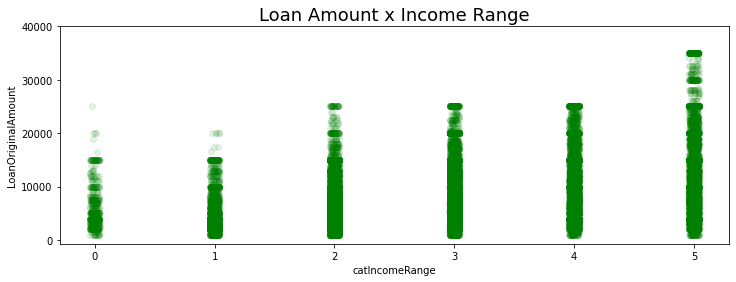

In [13]:
plt.figure(figsize=FIGSIZE)

plt.title('Loan Amount x Income Range', fontsize=FONTSIZE)
sns.regplot(data=df_loan, x='catIncomeRange', y='LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, color='g')
plt.yticks(np.arange(0, 40001, 10000))
plt.show()

Borrower with higher income takes higher loans.

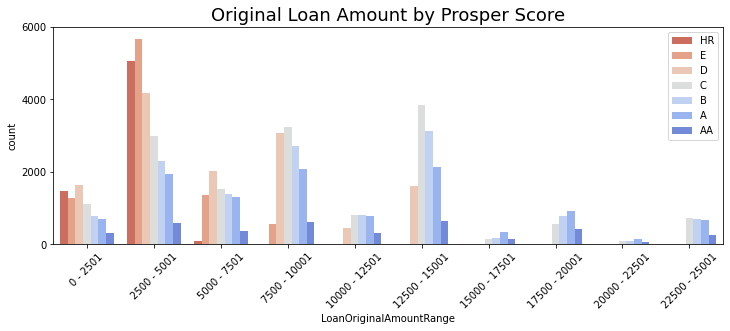

In [14]:
plt.figure(figsize=FIGSIZE)
plt.title('Original Loan Amount by Prosper Score', fontsize=FONTSIZE)

sns.countplot(data=df_loan, x='LoanOriginalAmountRange', hue='ProsperRating (Alpha)', palette='coolwarm_r')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 6001, 2000))
plt.legend(loc='upper right')

plt.show()

Here we don't have any surprise too - lower score is rare in higher loan amount range. Maybe because they don't have limit to loan big amount.

## Borrower Rate

<br/>

Now let's take a look in Borrower Rate - What's features that affect?

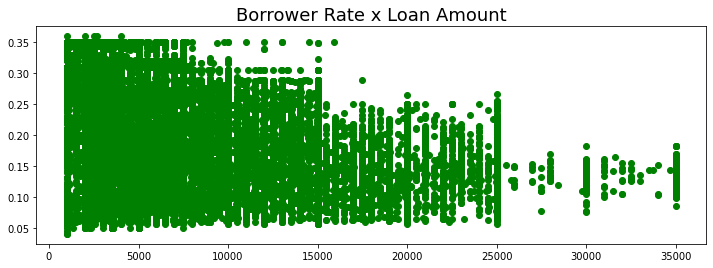

In [15]:
plt.figure(figsize=FIGSIZE)
plt.title('Borrower Rate x Loan Amount', fontsize=FONTSIZE)
plt.scatter(data=df_loan, x='LoanOriginalAmount', y='BorrowerRate', color='g')
plt.show()

Loan amount and borrower rate has negative correlation - the higher the loan amount, the lower the rate.  
Can Prosper rating influence in borrower rate?

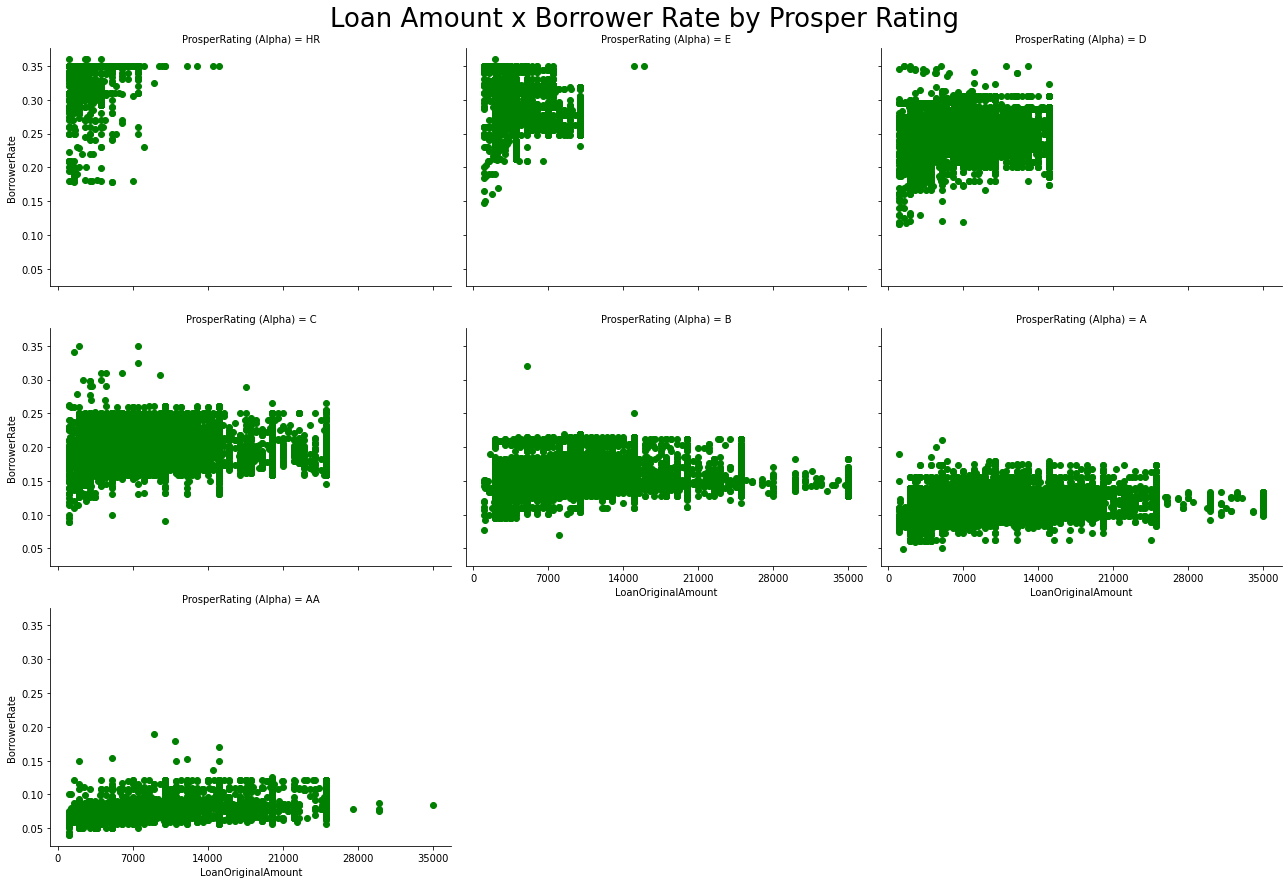

In [16]:

g = sns.FacetGrid(data=df_loan, col='ProsperRating (Alpha)', size=4, aspect=1.5, hue_kws=color, col_wrap=3);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
g.fig.suptitle('Loan Amount x Borrower Rate by Prosper Rating', fontsize=26, y=1.02)
g.set(xticks=np.arange(0, 35001, 7000))
plt.show()

And yes, prosper rating influences in borrower rate. We can see that lower rated borrower takes lower values.